# Honours Research
## 1715260

### Imports

In [1]:
import numpy as np
import typing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

from pprint import pprint
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
from data_processor import get_credit_ratings_train_test_split

In [3]:
sys.path.append("/home/vhutali/Desktop/projects/python/ML_finance_project_fast_api/src/ML_training/classification")
sys.path.append("/home/vhutali/Desktop/projects/python/ML_finance_project_fast_api/")

In [4]:
sys.path

['/home/vhutali/Desktop/projects/python/ML_finance_project_fast_api/src/utils',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/home/vhutali/Desktop/projects/python/ML_finance_project_fast_api/venv/lib/python3.10/site-packages',
 '/home/vhutali/Desktop/projects/python/ML_finance_project_fast_api/src/ML_training/classification',
 '/home/vhutali/Desktop/projects/python/ML_finance_project_fast_api/']

### Global functions and Variables

In [5]:
columns: typing.Optional[np.array] = None
used_columns = {}
indices: typing.Optional[np.array] = []

In [6]:
def get_columns_used(indices: np.ndarray, return_ = False) -> None:
    assert len(indices) == len(columns), "indices not the same length as columns"
    if return_:
        return columns[indices]
    for column in columns[indices]:
        try:
            used_columns[column] += 1
        except KeyError:
            used_columns[column] = 1

In [7]:
def plot_indices(indices):
    indices = np.array(indices, dtype=bool)
    for index in indices:
        get_columns_used(index)
    plt.bar(range(len(used_columns)), list(used_columns.values()), align='center', tick_label=list(used_columns.keys()))
    plt.xticks(rotation="vertical")
    plt.tight_layout()
#     plt.legend()
    plt.show()

### Classification

In [8]:
from sklearn.metrics import accuracy_score

from src.ML_training.classification.clustering_analysis.dbscan import DBScan
from src.ML_training.classification.clustering_analysis.hierarchical_cluster import HierarchicalCluster
from src.ML_training.classification.clustering_analysis.kmeans import KMeans_
from src.ML_training.classification.regression.huber_regression import MyHuberRegressor
from src.ML_training.classification.regression.logistic_regression import MyLogisticRegressor
from src.ML_training.classification.regression.linear_regression import LinearRegression, MyLinearRegressor
from src.ML_training.classification.regression.ridge_regression import MyRidgeRegressor
from src.ML_training.classification.regression.sgd_classifier import MySGD
from src.ML_training.classification.trees_and_ensembles.ada_boost import ADABoostClassifier_
from src.ML_training.base_model import BaseModel
from src.ML_training.classification.trees_and_ensembles.decision_tree import DecisionTreeClassifier_
from src.ML_training.classification.trees_and_ensembles.bagging_classifier import BaggingClassifier_
from src.ML_training.classification.trees_and_ensembles.extra_tree_classifier import ExtraTreeClassifier_
from src.ML_training.classification.trees_and_ensembles.gradient_boosting import GradientBoostingClassifier_
from src.ML_training.classification.trees_and_ensembles.random_forest import RandomForestClassifier_
from src.ML_training.classification.trees_and_ensembles.xgb import XGBoost
from src.ML_training.classification.trees_and_ensembles.xgbrf import XGBRFClassifier_

from src.utils.data_processor import get_credit_ratings_train_test_split

In [9]:
x_train, x_test, y_train, y_test, _, _, columns = get_credit_ratings_train_test_split()
columns

for column in columns:
    print(column, end="\\\ \n-")

Number of unique ratings: 10
Sector\\ 
-Current Ratio\\ 
-Long-term Debt / Capital\\ 
-Debt/Equity Ratio\\ 
-Gross Margin\\ 
-Operating Margin\\ 
-EBIT Margin\\ 
-EBITDA Margin\\ 
-Pre-Tax Profit Margin\\ 
-Net Profit Margin\\ 
-Asset Turnover\\ 
-ROE - Return On Equity\\ 
-Return On Tangible Equity\\ 
-ROA - Return On Assets\\ 
-ROI - Return On Investment\\ 
-Operating Cash Flow Per Share\\ 
-Free Cash Flow Per Share\\ 
-

In [10]:
models: {str, BaseModel} = {
    "LinearRegression": MyLinearRegressor(x_train, x_test, y_train, y_test),
    "HuberRegression": MyHuberRegressor(x_train, x_test, y_train, y_test),
    "RidgeRegressor": MyRidgeRegressor(x_train, x_test, y_train, y_test),
    "LogisticRegression": MyLogisticRegressor(x_train, x_test, y_train, y_test),
    "SGD": MySGD(x_train, x_test, y_train, y_test),
    "XGBoost": XGBoost(x_train, x_test, y_train, y_test),
    "XGBRFClassifier": XGBRFClassifier_(x_train, x_test, y_train, y_test),
    "DecisionTreeClassifier": DecisionTreeClassifier_(x_train, x_test, y_train, y_test),
    "BaggingClassifier": BaggingClassifier_(x_train, x_test, y_train, y_test),
    "RandomForestClassifier": RandomForestClassifier_(x_train, x_test, y_train, y_test),
    "ADABoost": ADABoostClassifier_(x_train, x_test, y_train, y_test),
    "GradientBoosting": GradientBoostingClassifier_(x_train, x_test, y_train, y_test),
    "ExtraTreeClassifier": ExtraTreeClassifier_(x_train, x_test, y_train, y_test),
    "HierarchicalCluster": HierarchicalCluster(x_train, x_test, y_train, y_test),
    "DBScan": DBScan(x_train, x_test, y_train, y_test),
    "KMeans": KMeans_(x_train, x_test, y_train, y_test)
}

In [11]:
with open("/home/vhutali/Desktop/projects/python/ML_finance_project_fast_api/resources/outputs/classification/classification_3split.out") as regression_results:
    algorithms = {}
    continued: bool = False
    for line in regression_results:
        if "Testing " in line:
            algorithm = line.split(" ")[-1].replace("\n", "")
        if "Best fitness:" in line:
            fitness = line.split(" ")[-1].replace("\n", "")
        if "Best individual:" in line:
            index = line.split(":")[-1].split("[")[-1]
            continued = True
            continue
        if continued:
            if "End of testing" in line:
                if algorithm == "NN":
                    print("Skipping NN")
                    continue
                index = index.replace("\n", "").replace(" ", "").replace("[", "").replace("]", "")
                index = index.split(".")
                index.remove("")
                index = np.array(index, dtype=int)
                indices.append(index)
                index = np.array(index, dtype=bool)
                algorithms[algorithm] = [fitness, get_columns_used(index, return_ = True), index]
                continued = False
            else:
                index += line

algorithms

Skipping NN


{'XGBoost': ['0.7156398104265402',
  Index(['Sector', 'Current Ratio', 'Long-term Debt / Capital',
         'Debt/Equity Ratio', 'Gross Margin', 'Operating Margin',
         'Pre-Tax Profit Margin', 'Net Profit Margin', 'Asset Turnover',
         'Return On Tangible Equity', 'ROA - Return On Assets'],
        dtype='object'),
  array([ True,  True,  True,  True,  True,  True, False, False,  True,
          True,  True, False,  True,  True, False, False, False])],
 'XGBRFClassifier': ['0.5947867298578199',
  Index(['Sector', 'Debt/Equity Ratio', 'Gross Margin', 'Operating Margin',
         'EBITDA Margin', 'Net Profit Margin', 'Return On Tangible Equity',
         'ROA - Return On Assets', 'Operating Cash Flow Per Share'],
        dtype='object'),
  array([ True, False, False,  True,  True,  True, False,  True, False,
          True, False, False,  True,  True, False,  True, False])],
 'DecisionTreeClassifier': ['0.6895734597156398',
  Index(['Sector', 'Current Ratio', 'Long-term Debt /

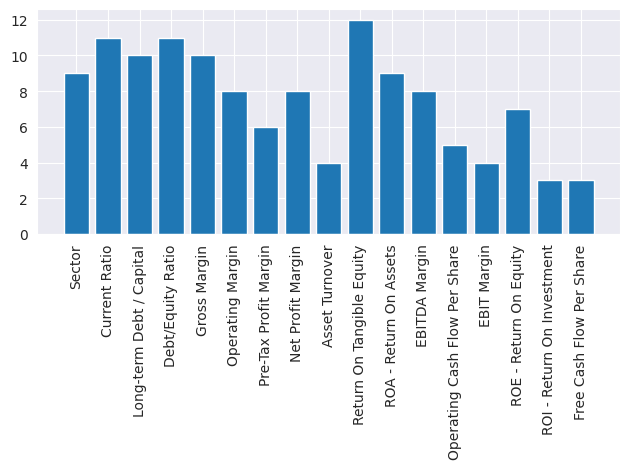

In [12]:
plot_indices(indices)

In [13]:
algorithms_df = pd.DataFrame(algorithms)
algorithms_df.rename_axis("Algorithms", axis="columns", inplace=True)
algorithms_df.rename(index={0:"training_mse", 1: "indices_used", 2: "indices_bool"}, inplace=True)
algorithms_df

Algorithms,XGBoost,XGBRFClassifier,DecisionTreeClassifier,BaggingClassifier,RandomForestClassifier,ADABoost,GradientBoosting,ExtraTreeClassifier,HierarchicalCluster,DBScan,KMeans,LinearRegression,HuberRegression,RidgeRegressor,LogisticRegression,SGD
training_mse,0.7156398104265402,0.5947867298578199,0.6895734597156398,0.7156398104265402,0.7440758293838863,0.36255924170616116,0.6516587677725119,0.6966824644549763,0.2843601895734597,0.22274881516587677,0.2985781990521327,0.19194312796208532,0.22748815165876776,0.34834123222748814,0.3957345971563981,0.3909952606635071
indices_used,"Index(['Sector', 'Current Ratio', 'Long-term D...","Index(['Sector', 'Debt/Equity Ratio', 'Gross M...","Index(['Sector', 'Current Ratio', 'Long-term D...","Index(['Sector', 'Current Ratio', 'Debt/Equity...","Index(['Sector', 'Current Ratio', 'Debt/Equity...","Index(['Current Ratio', 'Debt/Equity Ratio', '...","Index(['Sector', 'Current Ratio', 'Long-term D...","Index(['Sector', 'Current Ratio', 'Long-term D...","Index(['Operating Margin', 'EBIT Margin', 'EBI...","Index(['Long-term Debt / Capital', 'Return On ...","Index(['Current Ratio', 'Long-term Debt / Capi...","Index(['Sector', 'Current Ratio', 'Debt/Equity...","Index(['Long-term Debt / Capital', 'Debt/Equit...","Index(['Sector', 'Long-term Debt / Capital', '...","Index(['Current Ratio', 'Long-term Debt / Capi...","Index(['Current Ratio', 'Long-term Debt / Capi..."
indices_bool,"[True, True, True, True, True, True, False, Fa...","[True, False, False, True, True, True, False, ...","[True, True, True, True, True, False, True, Tr...","[True, True, False, True, True, True, False, F...","[True, True, False, True, True, False, False, ...","[False, True, False, True, False, True, False,...","[True, True, True, False, True, True, False, F...","[True, True, True, False, True, False, True, F...","[False, False, False, False, False, True, True...","[False, False, True, False, False, False, Fals...","[False, True, True, True, False, True, False, ...","[True, True, False, True, False, False, False,...","[False, False, True, True, False, True, True, ...","[True, False, True, True, True, False, False, ...","[False, True, True, True, True, False, False, ...","[False, True, True, False, True, False, False,..."


In [14]:
%%time
classification_accuracy_scores = {}
for algorithm in algorithms.items():
#     print(f"{algorithm[0]} :  {list(algorithm[1][2])}\n")
    classification_accuracy_scores[algorithm[0]] = models[algorithm[0]].score(algorithm[1][2])
classification_accuracy_scores

CPU times: user 5min 27s, sys: 2.31 s, total: 5min 29s
Wall time: 3min 10s


{'XGBoost': 0.7156398104265402,
 'XGBRFClassifier': 0.5947867298578199,
 'DecisionTreeClassifier': 0.6682464454976303,
 'BaggingClassifier': 0.6540284360189573,
 'RandomForestClassifier': 0.7274881516587678,
 'ADABoost': 0.36255924170616116,
 'GradientBoosting': 0.6469194312796208,
 'ExtraTreeClassifier': 0.6255924170616114,
 'HierarchicalCluster': 0.2843601895734597,
 'DBScan': 0.22274881516587677,
 'KMeans': 0.2985781990521327,
 'LinearRegression': 0.19194312796208532,
 'HuberRegression': 0.22748815165876776,
 'RidgeRegressor': 0.34834123222748814,
 'LogisticRegression': 0.3957345971563981,
 'SGD': 0.3246445497630332}

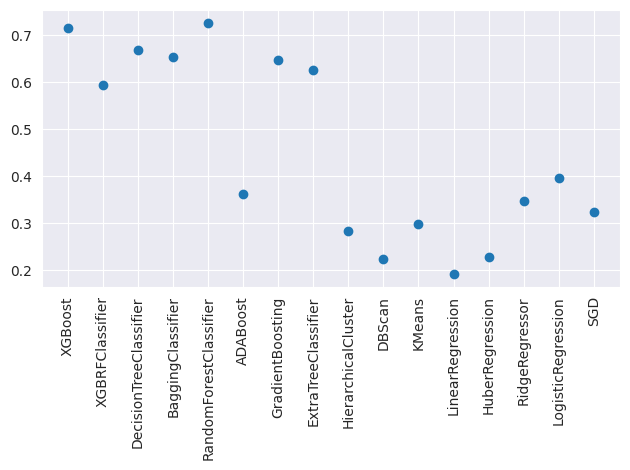

In [15]:
plt.scatter(classification_accuracy_scores.keys(),classification_accuracy_scores.values())
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()

In [16]:
y_pred = {}
x = np.linspace(0, y_test.shape[0], y_test.shape[0])
for model_name, model in models.items():
#     print(model.model.predict(x_test[algorithms[model_name]])
    try:
        y_pred[model_name] = model.model.predict(x_test[:,algorithms[model_name][2]])
    except AttributeError:
        y_pred[model_name] = model.model.fit_predict(x_test[:,algorithms[model_name][2]])
#     plt.subplot(len(models) + 1, 1, view_order)

y_pred["LinearRegression"] = abs(np.round(y_pred["LinearRegression"]))
y_pred["HuberRegression"] = abs(np.round(y_pred["HuberRegression"]))


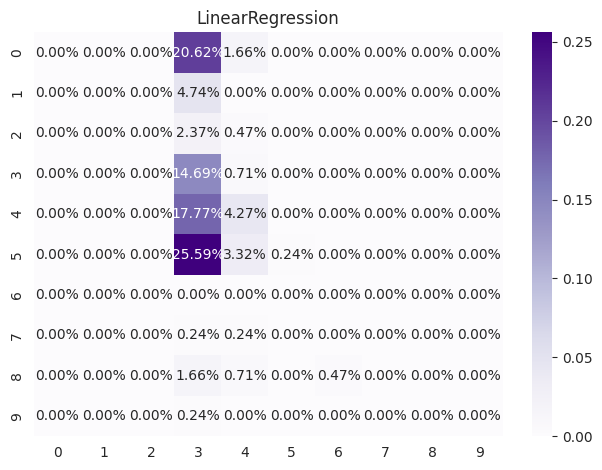

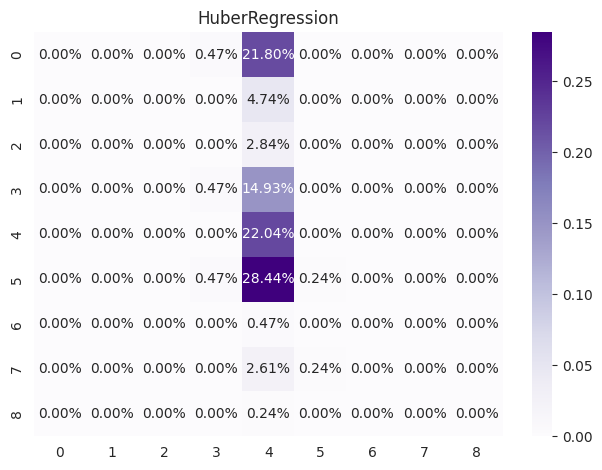

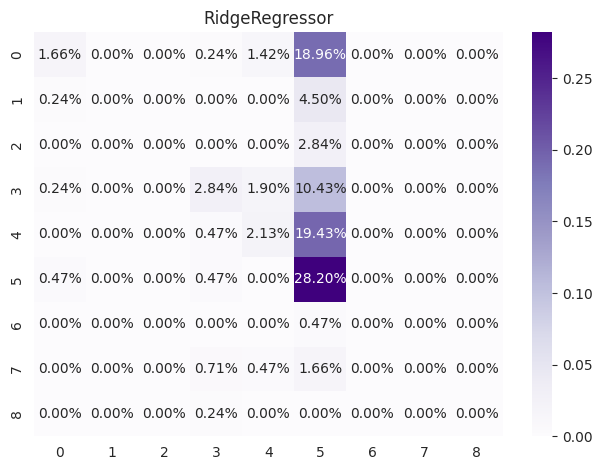

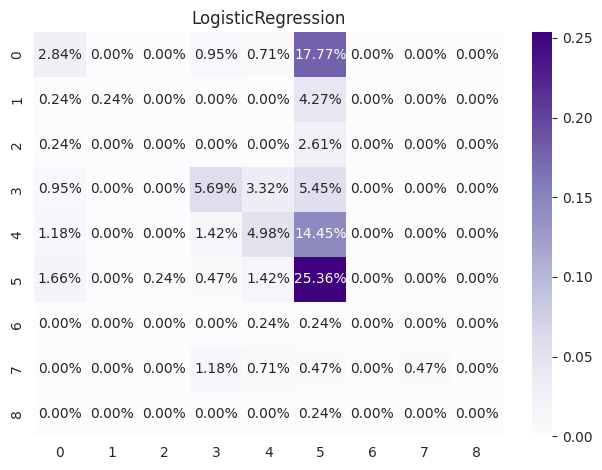

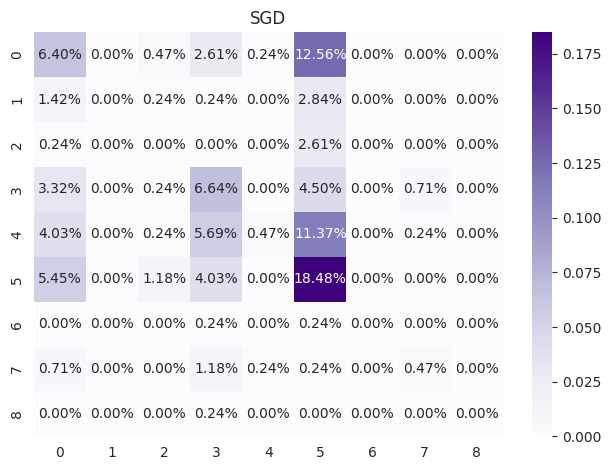

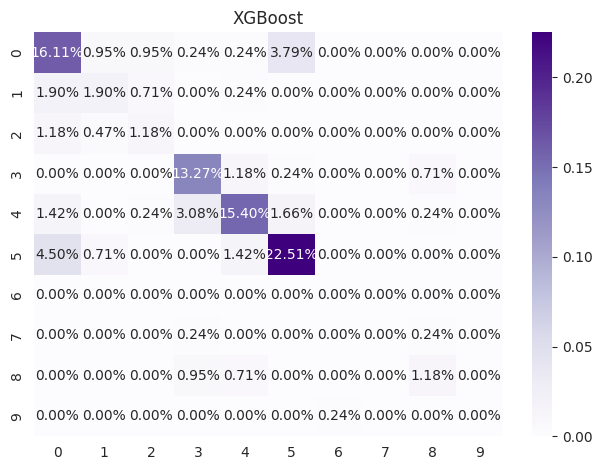

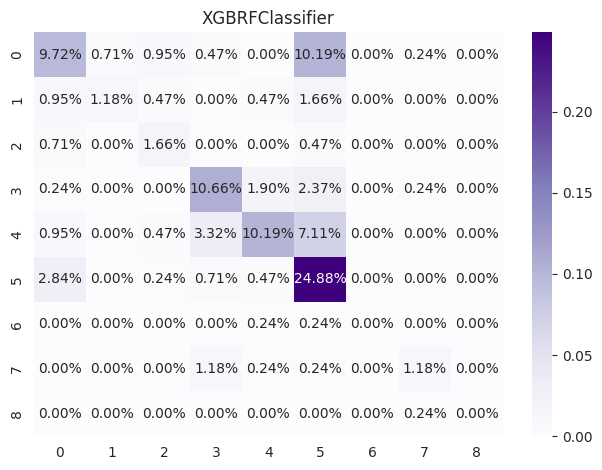

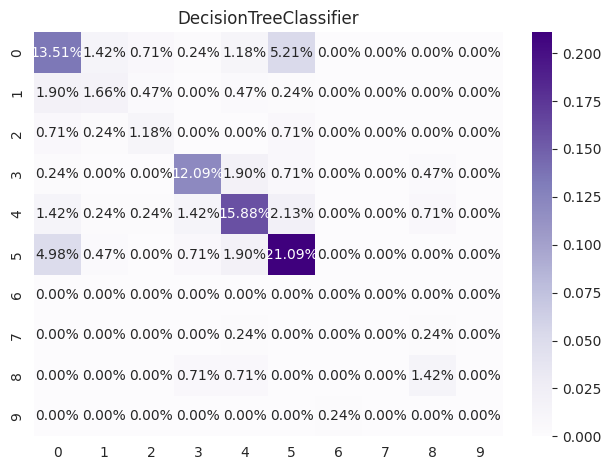

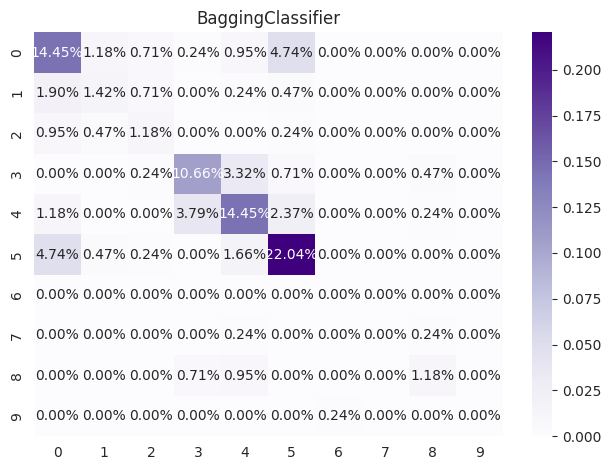

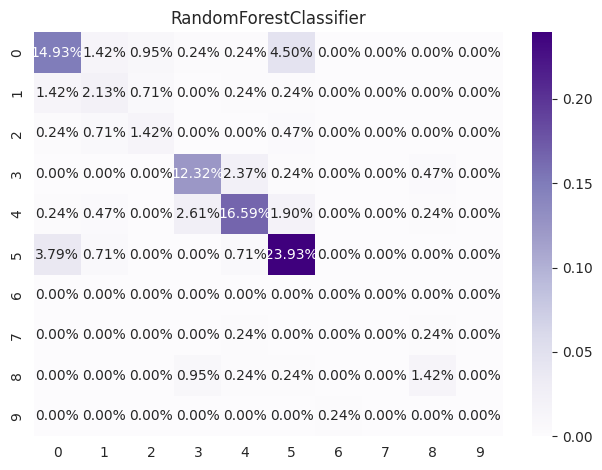

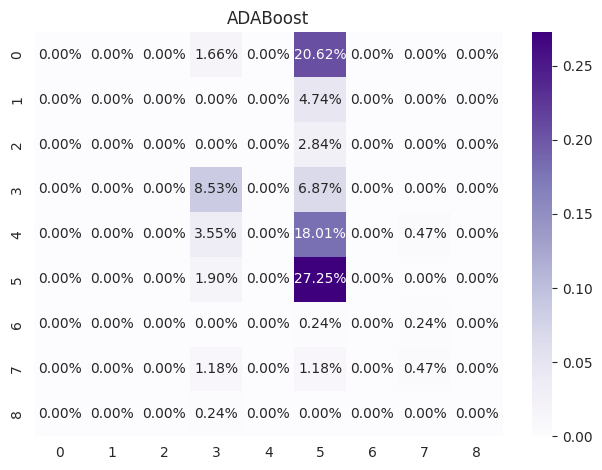

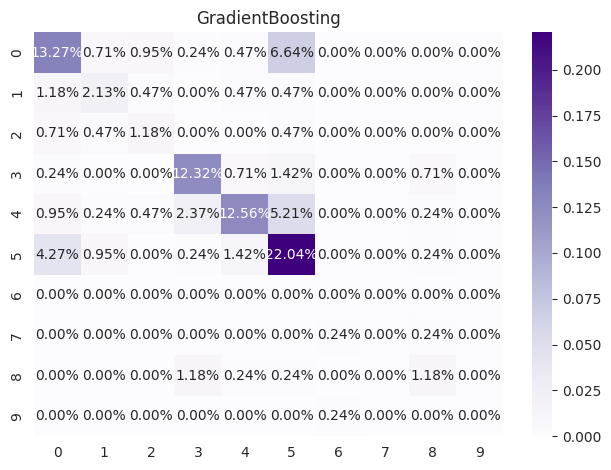

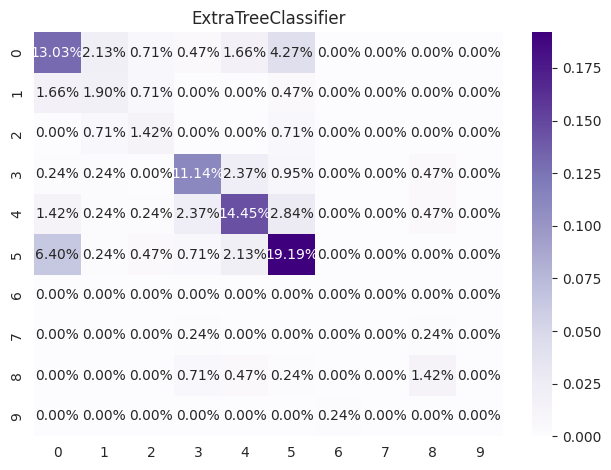

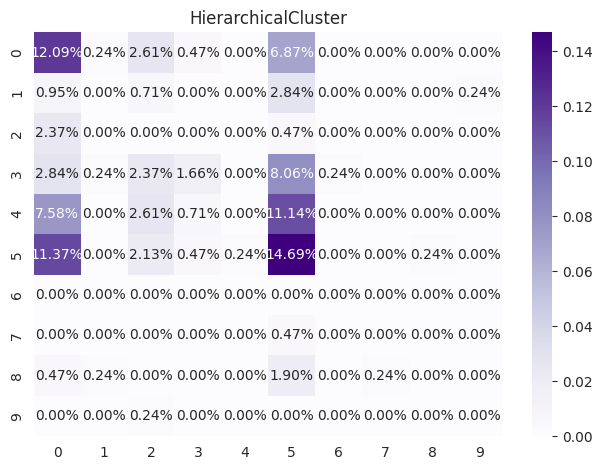

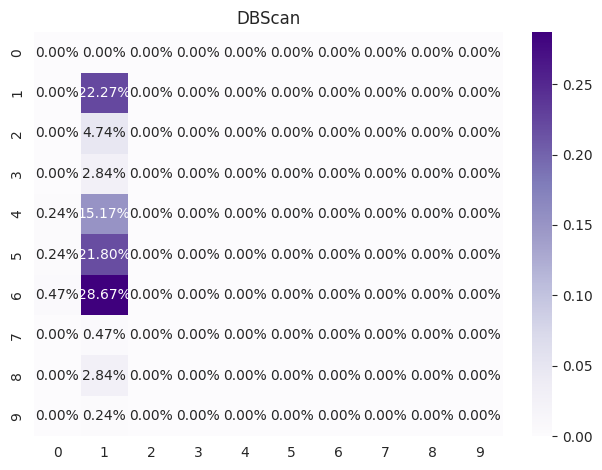

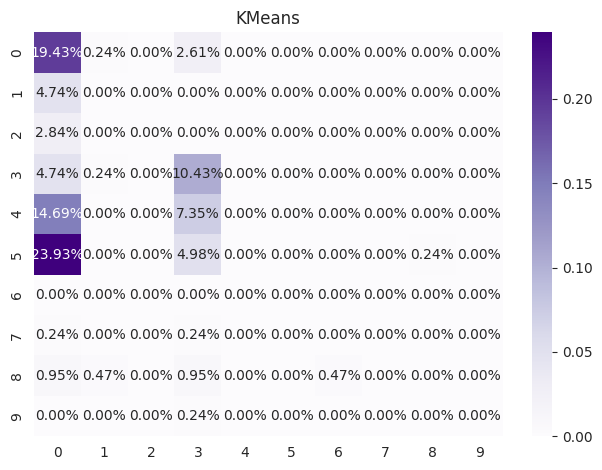

In [17]:
for model_name, prediction in y_pred.items():
    plt.title(model_name)
    cf_matrix = confusion_matrix(y_test, prediction)
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Purples')
    plt.tight_layout()
    plt.show()

In [18]:
classification_difference_table = pd.DataFrame(y_test - y_test)
for y in y_pred.values():
    y = pd.Series(y)
    classification_difference_table = pd.concat([classification_difference_table, abs(y - y_test)], axis=1, ignore_index=True)
columns = ["y_test"] + list(y_pred.keys())
columns
classification_difference_table.rename(columns=dict(enumerate(columns)), inplace=True)
classification_difference_table

,y_test,LinearRegression,HuberRegression,RidgeRegressor,LogisticRegression,SGD,XGBoost,XGBRFClassifier,DecisionTreeClassifier,BaggingClassifier,RandomForestClassifier,ADABoost,GradientBoosting,ExtraTreeClassifier,HierarchicalCluster,DBScan,KMeans
0,0,2.0,3.0,4,4,2,3,3,3,4,3,4,3,4,4,1,1
1,0,3.0,4.0,4,5,5,0,5,0,0,0,5,0,0,0,0,0
2,0,1.0,0.0,1,1,1,0,1,1,1,0,1,0,0,1,4,4
3,0,3.0,3.0,5,5,0,5,5,5,5,5,5,5,5,0,0,0
4,0,4.0,4.0,5,5,5,0,0,0,0,0,5,0,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,0,3.0,4.0,5,5,3,0,0,0,0,0,5,0,0,2,0,0
418,0,3.0,4.0,5,5,3,0,5,0,0,0,5,5,0,0,0,0
419,0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,5,5,5
420,0,2.0,2.0,3,3,3,0,0,0,0,0,3,0,0,2,2,2


In [19]:
classification_difference_table.describe()

,y_test,LinearRegression,HuberRegression,RidgeRegressor,LogisticRegression,SGD,XGBoost,XGBRFClassifier,DecisionTreeClassifier,BaggingClassifier,RandomForestClassifier,ADABoost,GradientBoosting,ExtraTreeClassifier,HierarchicalCluster,DBScan,KMeans
count,422.0,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.00000
mean,0.0,1.694313,1.665877,1.874408,1.815166,2.066351,0.829384,1.187204,1.007109,0.952607,0.774882,1.881517,1.049763,1.078199,2.170616,3.196682,2.50237
std,0.0,1.191385,1.514686,1.939919,1.990227,1.997708,1.630846,1.844431,1.745696,1.681994,1.583476,1.982151,1.769332,1.761571,1.949307,2.118057,2.13193
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
50%,0.0,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,4.000000,2.00000
75%,0.0,3.000000,3.000000,4.000000,4.000000,4.000000,1.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,5.000000,5.00000
max,0.0,6.000000,5.000000,6.000000,5.000000,8.000000,5.000000,8.000000,5.000000,5.000000,5.000000,6.000000,5.000000,5.000000,8.000000,9.000000,8.00000


In [20]:
classification_table = pd.DataFrame(y_test)

for y in y_pred.values():
    y = pd.Series(y)
    classification_table = pd.concat([classification_table, y], axis=1, ignore_index=True)
columns = ["y_test"] + list(y_pred.keys())
columns
classification_table.rename(columns=dict(enumerate(columns)), inplace=True)
classification_table

,y_test,LinearRegression,HuberRegression,RidgeRegressor,LogisticRegression,SGD,XGBoost,XGBRFClassifier,DecisionTreeClassifier,BaggingClassifier,RandomForestClassifier,ADABoost,GradientBoosting,ExtraTreeClassifier,HierarchicalCluster,DBScan,KMeans
0,1,3.0,4.0,5,5,3,4,4,4,5,4,5,4,5,5,0,0
1,0,3.0,4.0,4,5,5,0,5,0,0,0,5,0,0,0,0,0
2,4,3.0,4.0,5,5,5,4,5,5,5,4,5,4,4,5,0,0
3,0,3.0,3.0,5,5,0,5,5,5,5,5,5,5,5,0,0,0
4,0,4.0,4.0,5,5,5,0,0,0,0,0,5,0,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,0,3.0,4.0,5,5,3,0,0,0,0,0,5,0,0,2,0,0
418,0,3.0,4.0,5,5,3,0,5,0,0,0,5,5,0,0,0,0
419,5,4.0,4.0,5,5,5,5,5,5,5,5,5,5,5,0,0,0
420,2,4.0,4.0,5,5,5,2,2,2,2,2,5,2,2,0,0,0


In [21]:
classification_table.describe()

,y_test,LinearRegression,HuberRegression,RidgeRegressor,LogisticRegression,SGD,XGBoost,XGBRFClassifier,DecisionTreeClassifier,BaggingClassifier,RandomForestClassifier,ADABoost,GradientBoosting,ExtraTreeClassifier,HierarchicalCluster,DBScan,KMeans
count,422.000000,422.000000,422.000000,422.00000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,3.187204,3.132701,3.990521,4.71090,4.334123,3.466825,3.016588,3.635071,3.184834,3.144550,3.203791,4.694313,3.293839,3.094787,2.722749,-0.009479,0.860190
std,2.111056,0.385512,0.137522,0.91013,1.393818,2.057970,2.096759,1.897492,2.090348,2.060938,2.037927,0.835049,2.074368,2.081595,2.350803,0.097011,1.416522
min,0.000000,3.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,1.000000,3.000000,4.000000,5.00000,4.000000,3.000000,0.250000,3.000000,1.000000,1.000000,1.000000,5.000000,1.250000,1.000000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,4.000000,5.00000,5.000000,5.000000,3.500000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,3.000000,0.000000,0.000000
75%,5.000000,3.000000,4.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.000000,3.000000
max,9.000000,6.000000,5.000000,5.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,9.000000,0.000000,8.000000
